In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
#conn = engine.connect()
#data_meas = pd.read_sql("SELECT * FROM measurement", conn)
#data_meas.head()
#data_meas.count()

In [7]:
#data_station_sum = pd.read_sql("SELECT date, sum(prcp) as prcp FROM measurement where date > GROUP BY date",conn)
#data_station_sum.head()

#data_station_sum.count()

In [8]:
#data_station_last = pd.read_sql("SELECT date FROM measurement ORDER BY date",conn)

In [9]:
#data_station = pd.read_sql("SELECT * FROM station", conn)
#data_station.head()

In [10]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [11]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [12]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [13]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [15]:
inspector = inspect(engine)
inspector.get_table_names()


['measurement', 'station']

In [16]:
columns1 = inspector.get_columns('measurement')
for c in columns1:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [17]:
columns2 = inspector.get_columns('station')
for c in columns2:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [42]:
first_date = session.query(Measurement.date).order_by(Measurement.date).first()
print(first_date)

last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date)

('2010-01-01',)
('2017-08-23',)


In [43]:
#results = session.query(Measurement.date, func.sum(Measurement.prcp).label("total_prcp")).group_by(Measurement.date).all()
results = session.query(Measurement.date, func.sum(Measurement.prcp).label("total_prcp")).group_by(Measurement.date).filter(Measurement.date>'2016-08-23').all()


In [44]:
date = [result[0] for result in results]
prcp = [float(result[1]) for result in results]

In [46]:
date_df = pd.DataFrame(date)
date_df.head()

prcp_df = pd.DataFrame(prcp)
prcp_df.head()

,0
0,9.33
1,0.54
2,0.10
3,0.32
4,3.10


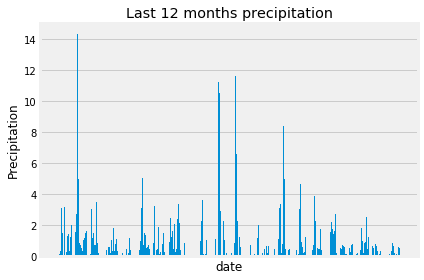

In [90]:
fig, ax = plt.subplots()
ax.bar(date,prcp, label=None)
ax.set_xlabel("date")
ax.set_ylabel("Precipitation")
ax.set_title("Last 12 months precipitation")
ax.set_xticks([])
fig.tight_layout()
plt.show()

In [48]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,0
count,365.000000
mean,0.974164
std,1.776466
min,0.000000
25%,0.050000
50%,0.400000
75%,1.080000
max,14.280000


In [97]:
results_1 = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>'2016-08-23').filter(Measurement.prcp>0).all()
date_1 = [result[0] for result in results_1]
prcp_1 = [result[1] for result in results_1]



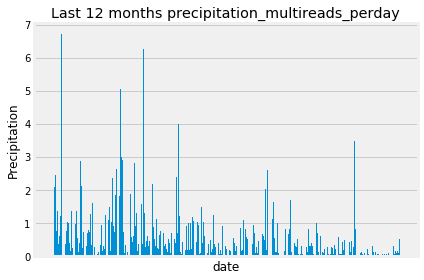

In [98]:
date_1_df = pd.DataFrame(date_1)
prcp_1_df = pd.DataFrame(prcp_1)

fig, ax = plt.subplots()
ax.bar(date_1,prcp_1, label=None)
ax.set_xlabel("date")
ax.set_ylabel("Precipitation")
ax.set_title("Last 12 months precipitation_multireads_perday")
ax.set_xticks([])
fig.tight_layout()
plt.show()

In [108]:
prcp_1_df.describe()

,0
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [58]:
# Design a query to show how many stations are available in this dataset?
#results = session.query(Station).func.count(Station.station).all()
results = session.query(func.count(Station.station)).all()
print(results)

[(9,)]


In [68]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
results = session.query(Measurement.station, func.count(Measurement.station).label("total_count")).group_by(Measurement.station).order_by(func.count(Measurement.station).label("total_count").desc()).all()
for row in results:
    print(results)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]
[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]
[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]
[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]
[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517

In [77]:

max_active_station = [result[0] for result in results[:1]]
#print(max_active_station)
read_station = session.query(func.max(Measurement.tobs),func.min(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()
print(read_station)
#group_by(Measurement.station).order_by(func.count(Measurement.station).label("total_count").desc()).all()

[(85.0, 54.0, 71.66378066378067)]


In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

results.first()

[(54.0, 85.0, 71.66378066378067)]

In [85]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results_two = session.query(Measurement.tobs).filter(Measurement.station=='USC00519281').filter(Measurement.date>'2016-08-23').all()
for row in results_two:
    print(row)




(77.0,)
(80.0,)
(80.0,)
(75.0,)
(73.0,)
(78.0,)
(77.0,)
(78.0,)
(80.0,)
(80.0,)
(78.0,)
(78.0,)
(78.0,)
(73.0,)
(74.0,)
(80.0,)
(79.0,)
(77.0,)
(80.0,)
(76.0,)
(79.0,)
(75.0,)
(79.0,)
(78.0,)
(79.0,)
(78.0,)
(78.0,)
(76.0,)
(74.0,)
(77.0,)
(78.0,)
(79.0,)
(79.0,)
(77.0,)
(80.0,)
(78.0,)
(78.0,)
(78.0,)
(77.0,)
(79.0,)
(79.0,)
(79.0,)
(79.0,)
(75.0,)
(76.0,)
(73.0,)
(72.0,)
(71.0,)
(77.0,)
(79.0,)
(78.0,)
(79.0,)
(77.0,)
(79.0,)
(77.0,)
(78.0,)
(78.0,)
(78.0,)
(78.0,)
(77.0,)
(74.0,)
(75.0,)
(76.0,)
(73.0,)
(76.0,)
(74.0,)
(77.0,)
(76.0,)
(76.0,)
(74.0,)
(75.0,)
(75.0,)
(75.0,)
(75.0,)
(71.0,)
(63.0,)
(70.0,)
(68.0,)
(67.0,)
(77.0,)
(74.0,)
(77.0,)
(76.0,)
(76.0,)
(75.0,)
(76.0,)
(75.0,)
(73.0,)
(75.0,)
(73.0,)
(75.0,)
(74.0,)
(75.0,)
(74.0,)
(75.0,)
(73.0,)
(75.0,)
(73.0,)
(73.0,)
(74.0,)
(70.0,)
(72.0,)
(70.0,)
(67.0,)
(67.0,)
(69.0,)
(70.0,)
(68.0,)
(69.0,)
(69.0,)
(66.0,)
(65.0,)
(68.0,)
(62.0,)
(75.0,)
(70.0,)
(69.0,)
(76.0,)
(76.0,)
(74.0,)
(73.0,)
(71.0,)
(74.0,)
(74.0,)
(72.0,)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020E30401940>]],
      dtype=object)

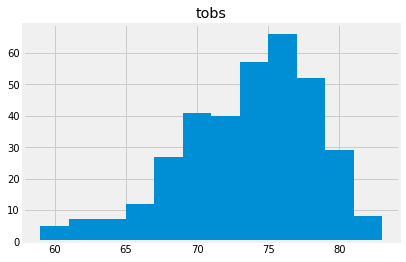

In [87]:
results_two_df = pd.DataFrame(results_two)
results_two_df.head()

results_two_df.hist(bins=12)

In [109]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [112]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
temps = calc_temps('2016-02-28', '2016-03-05')
print(temps)

[(62.0, 69.88636363636364, 80.0)]


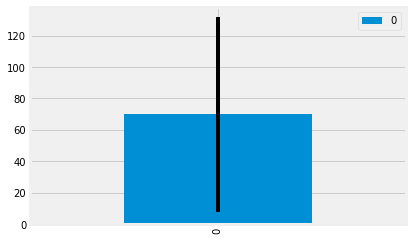

In [120]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
temp_avg= [temp[1] for temp in temps]
temp_avg_df = pd.DataFrame(temp_avg)
#print(temp_avg)

temp_avg_df.plot(kind='bar', yerr=62)

In [19]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

results = session.query(Measurement.station, Measurement.date, func.sum(Measurement.prcp).label("total_prcp")).group_by(Measurement.date).filter(Measurement.date>'2016-08-23').all()


[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


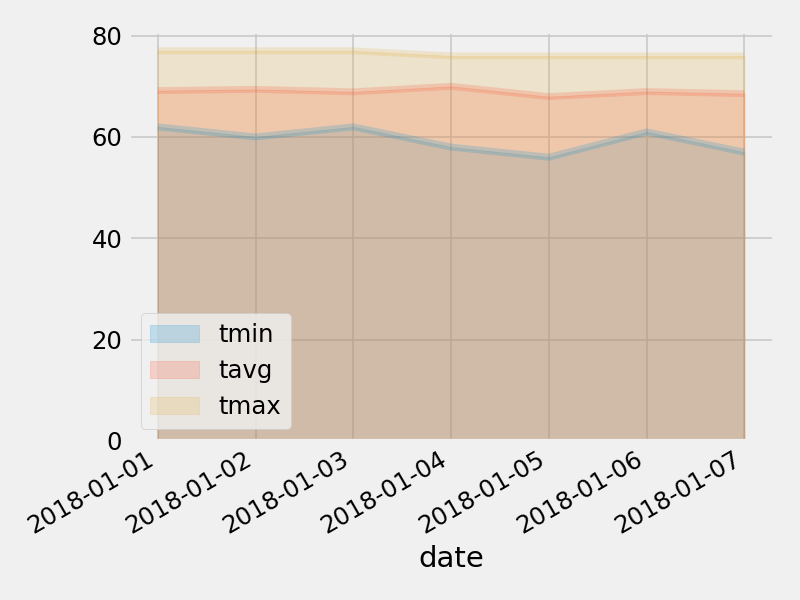

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
